In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## creating a sample of train andd test data

In [2]:
n_train =  15100028
s = 100000
skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))

In [3]:
df_train = pd.read_csv('train_new.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows=skip_train, names=['indicator_link'])

In [4]:
df_train.head()

,source_node,destination_node,indicator_link
0,681210,578094,1.0
1,1015263,1228626,1.0
2,1259643,1022345,1.0
3,1570194,1742232,1.0
4,637374,1344,1.0


In [5]:
df_train.shape

(100002, 3)

In [6]:
n_test = 3775006
s = 50000
skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))

In [7]:
df_test = pd.read_csv('test_new.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows=skip_test, names=['indicator_link'])

In [8]:
df_test.head()

,source_node,destination_node,indicator_link
0,250429,1083478,1.0
1,692467,1663572,1.0
2,1270898,163211,1.0
3,1690393,148456,1.0
4,1690889,1429595,1.0


In [9]:
df_test.shape

(50002, 3)

## Jaccard distance

In [10]:
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [11]:
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

## cosine similarity

In [12]:
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [13]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

## page rank

In [14]:
train_graph=nx.read_edgelist('train_clean.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

pr = nx.pagerank(train_graph, alpha=0.85)

In [15]:
print('min: ',min(pr.values()))
print('max: ',max(pr.values()))
print('mean: ',float(sum(pr.values())) / len(pr))

min:  1.6556497245737814e-07
max:  2.7098251341935827e-05
mean:  5.615699699389075e-07


In [16]:
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


## shortest path length

In [17]:
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

## checking if both users belong to same weakly connected components

In [18]:
wcc=list(nx.weakly_connected_components(train_graph))

def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

## Adar index

In [19]:
def adar_index(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

## Katz Centrality

In [21]:
katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)

In [22]:
print('min: ', min(katz.values()))
print('max: ', max(katz.values()))
print('mean: ', float(sum(katz.values())) / len(katz))

min:  0.0007313532484065916
max:  0.003394554981699122
mean:  0.0007483800935562018


In [23]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483800935562018


## Hits Score

In [24]:
 hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)

## Featurization

In [25]:
df_train['jaccard_followers'] = df_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
df_test['jaccard_followers'] = df_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

In [26]:
df_train['jaccard_followees'] = df_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
df_test['jaccard_followees'] = df_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)

In [27]:
df_train['cosine_followers'] = df_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
df_test['cosine_followers'] = df_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

In [28]:
df_train['cosine_followees'] = df_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
df_test['cosine_followees'] = df_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [29]:
df_train['shortest_path_length'] = df_train.apply(lambda row:
                                            compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
df_test['shortest_path_length'] = df_test.apply(lambda row:
                                            compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

In [30]:
df_train['belongs_to_same_wcc'] = df_train.apply(lambda row:
                                            belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
df_test['belongs_to_same_wcc'] = df_test.apply(lambda row:
                                            belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

In [31]:
df_train['adar_index'] = df_train.apply(lambda row:
                                            adar_index(row['source_node'],row['destination_node']),axis=1)
df_test['adar_index'] = df_test.apply(lambda row:
                                            adar_index(row['source_node'],row['destination_node']),axis=1)

In [32]:
df_train['page_rank_s'] = df_train.source_node.apply(lambda x:pr.get(x,mean_pr))
df_train['page_rank_d'] = df_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_test['page_rank_s'] = df_test.source_node.apply(lambda x:pr.get(x,mean_pr))
df_test['page_rank_d'] = df_test.destination_node.apply(lambda x:pr.get(x,mean_pr))

In [33]:
df_train['katz_s'] = df_train.source_node.apply(lambda x: katz.get(x,mean_katz))
df_train['katz_d'] = df_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_test['katz_s'] = df_test.source_node.apply(lambda x: katz.get(x,mean_katz))
df_test['katz_d'] = df_test.destination_node.apply(lambda x: katz.get(x,mean_katz))

In [34]:
df_train['hubs_s'] = df_train.source_node.apply(lambda x: hits[0].get(x,0))
df_train['hubs_d'] = df_train.destination_node.apply(lambda x: hits[0].get(x,0))

df_test['hubs_s'] = df_test.source_node.apply(lambda x: hits[0].get(x,0))
df_test['hubs_d'] = df_test.destination_node.apply(lambda x: hits[0].get(x,0))

In [35]:
df_train['authorities_s'] = df_train.source_node.apply(lambda x: hits[1].get(x,0))
df_train['authorities_d'] = df_train.destination_node.apply(lambda x: hits[1].get(x,0))

df_test['authorities_s'] = df_test.source_node.apply(lambda x: hits[1].get(x,0))
df_test['authorities_d'] = df_test.destination_node.apply(lambda x: hits[1].get(x,0))

In [36]:
df_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,shortest_path_length,belongs_to_same_wcc,adar_index,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,681210,578094,1.0,0,0.066667,0,0,2,1,1.047952,1.581296e-06,2.363783e-07,0.000761,0.000739,1.315252e-17,1.997768e-19,2.633042e-17,1.168928e-19
1,1015263,1228626,1.0,0,0.000000,0,0,3,1,0.000000,3.246765e-07,1.829068e-06,0.000735,0.000777,4.885614e-18,1.850402e-18,2.272397e-23,6.804640e-16
2,1259643,1022345,1.0,0,0.333333,0,0,2,1,2.940405,3.734641e-07,3.866163e-07,0.000751,0.000747,6.613329e-18,1.160654e-17,6.812246e-19,4.747461e-18
3,1570194,1742232,1.0,0,0.300000,0,0,2,1,3.763725,1.406635e-06,3.724099e-07,0.000757,0.000743,1.190506e-16,2.352525e-18,7.643179e-16,1.528837e-18
4,637374,1344,1.0,0,0.000000,0,0,5,1,0.000000,1.655650e-07,1.373647e-06,0.000731,0.000768,1.051982e-14,0.000000e+00,0.000000e+00,1.282472e-15


In [40]:
df_train.to_csv("train_graph_features.csv", index = None)
df_test.to_csv("test_graph_features.csv", index = None)

## classification models on graph based features

In [41]:
y_train = df_train.indicator_link
y_test = df_test.indicator_link

In [42]:
df_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [43]:
x_train = df_train.values
x_test = df_test.values

y_train = y_train.values
y_test = y_test.values

y_train.reshape(-1,1)
y_test.reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [44]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [45]:
estimators = [10, 50, 100, 250, 500, 1000, 2000]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(x_train,y_train)
    train_sc = f1_score(y_train,clf.predict(x_train))
    test_sc = f1_score(y_test,clf.predict(x_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

Estimators =  10 Train Score 0.8560440289105498 test Score 0.8579899986723901
Estimators =  50 Train Score 0.8453778696307882 test Score 0.8480239762027241
Estimators =  100 Train Score 0.8466937569264869 test Score 0.8496424328020266
Estimators =  250 Train Score 0.8565237579322086 test Score 0.8586872244744246
Estimators =  500 Train Score 0.8572186308635836 test Score 0.8593258626035345
Estimators =  1000 Train Score 0.8564824542971212 test Score 0.8587886038371216
Estimators =  2000 Train Score 0.8572090969308899 test Score 0.859165523649396


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

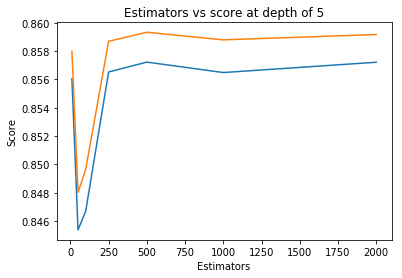

In [46]:
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [47]:
max_depth = [5, 7, 9, 11, 12, 13, 15]
train_scores = []
test_scores = []
for i in max_depth:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth = i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators = 500, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(x_train,y_train)
    train_sc = f1_score(y_train,clf.predict(x_train))
    test_sc = f1_score(y_test,clf.predict(x_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('max_depth = ',i,'Train Score',train_sc,'test Score',test_sc)

max_depth =  5 Train Score 0.8572186308635836 test Score 0.8593258626035345
max_depth =  7 Train Score 0.8580514791135258 test Score 0.8600894082237861
max_depth =  9 Train Score 0.859034044524855 test Score 0.8613051551861348
max_depth =  11 Train Score 0.859845644983462 test Score 0.8620224917699564
max_depth =  12 Train Score 0.8598392555924281 test Score 0.8619973486522314
max_depth =  13 Train Score 0.8598202965657902 test Score 0.8619973486522314
max_depth =  15 Train Score 0.8598392555924281 test Score 0.8619973486522314


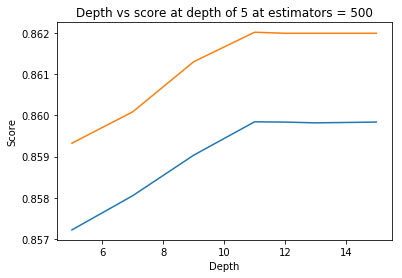

In [48]:
plt.plot(max_depth,train_scores,label='Train Score')
plt.plot(max_depth,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 500')
plt.show()

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
grid = {'n_estimators': estimators, 'max_depth': max_depth}

In [51]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)

In [52]:
rf = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter = 100, cv = 3, verbose=0, n_jobs = -1)

In [53]:
rf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 100, 250, 500, 1000, 2000], 'max_depth': [5, 7, 9, 11, 12, 13, 15]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [54]:
train_sc = f1_score(y_train,rf.predict(x_train))
test_sc = f1_score(y_test,rf.predict(x_test))

In [55]:
train_sc

0.8554451523454264

In [56]:
test_sc

0.8579365079365079